In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28,28]))
model1.add(keras.layers.Dense(300, activation="relu")) # neurun 300
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
hist = model1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0004 - accuracy: 0.6789 - val_loss: 0.5267 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5048 - accuracy: 0.8254 - val_loss: 0.4420 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4557 - accuracy: 0.8440 - val_loss: 0.4097 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4202 - accuracy: 0.8526 - val_loss: 0.4004 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4053 - accuracy: 0.8575 - val_loss: 0.3986 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3861 - accuracy: 0.8631 - val_loss: 0.3943 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3701 - accuracy: 0.8697 - val_loss: 0.3675 - val_accuracy:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

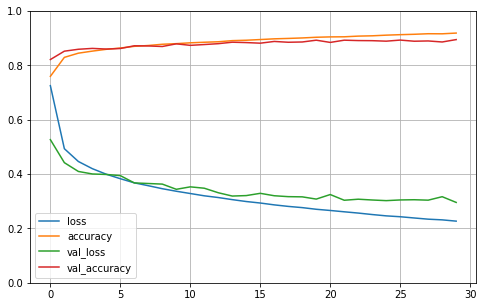

In [24]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8847


[0.32349368929862976, 0.8847000002861023]

In [27]:
X_new = X_test[:3]
y_proba = model1.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_pred = model1.predict_classes(X_new)
np.array(class_names)[y_pred]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
# keras wide depp learning
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 3.3488 - accuracy: 0.1020 - val_loss: 3.3322 - val_accuracy: 0.0914
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 3.3326 - accuracy: 0.1013 - val_loss: 3.3322 - val_accuracy: 0.0914
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 3.3322 - accuracy: 0.0976 - val_loss: 3.3322 - val_accuracy: 0.0914
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 3.3322 - accuracy: 0.1017 - val_loss: 3.3322 - val_accuracy: 0.0914
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 3.3322 - accuracy: 0.1015 - val_loss: 3.3322 - val_accuracy: 0.0914
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 3.3322 - accuracy: 0.1014 - val_loss: 3.3322 - val_accuracy: 0.0914
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 3.3322 - accuracy: 0.1004 - val_loss: 3.3322 - val_accuracy:

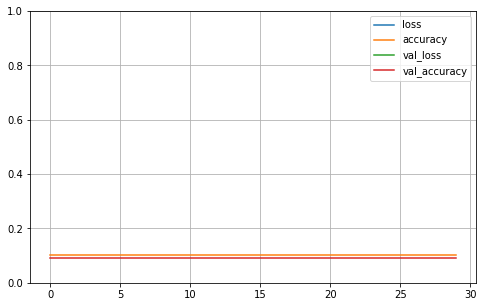

In [36]:
# data를 바궜어야 하는데 안 바꿈. 이런식으로 model을 만들면 된다는 점만 기억하자
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()